Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



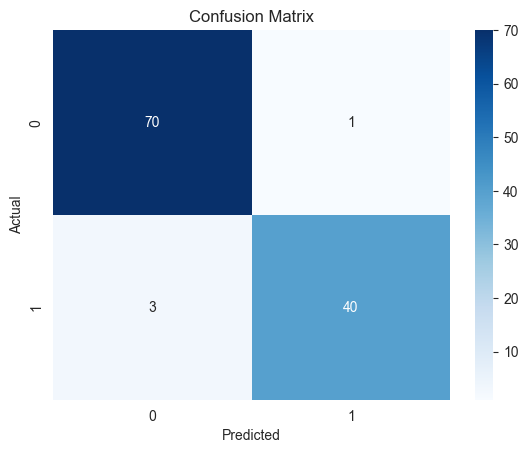

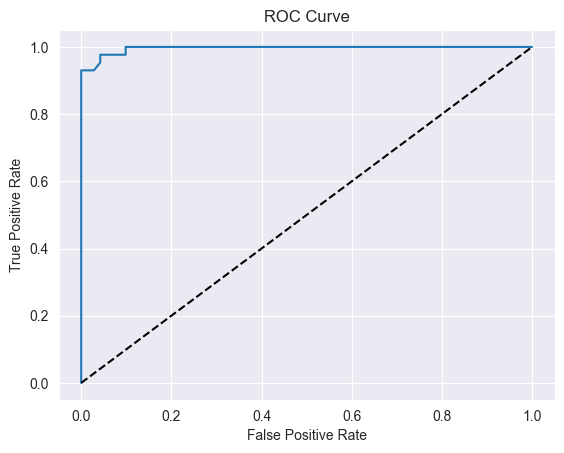

ROC AUC Score: 0.9959056665574845


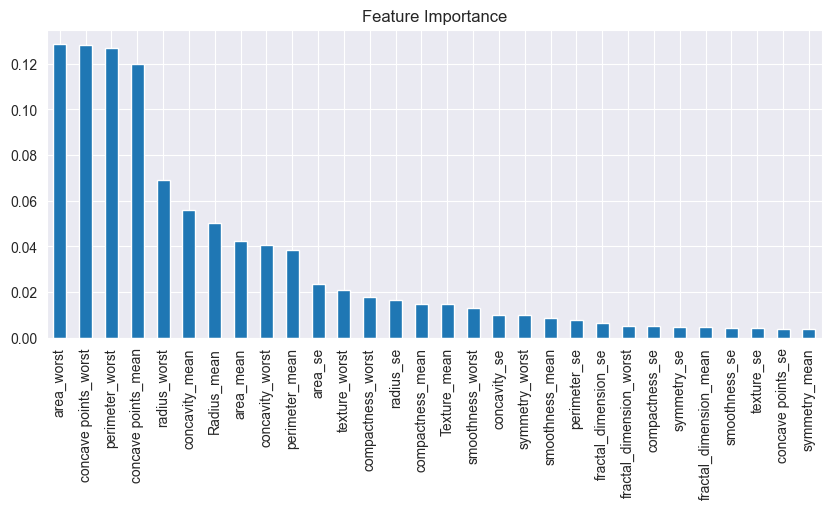

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\Administrator\\Documents\\breast cancer prediction\\data.csv")


df = df.drop(["id"], axis=1)

df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Feature Importance")
plt.show()



==== Decision Tree ====
Accuracy: 0.9123
ROC AUC: 0.877

Classification report:
               precision    recall  f1-score   support

           0     0.8974    0.9722    0.9333        72
           1     0.9444    0.8095    0.8718        42

    accuracy                         0.9123       114
   macro avg     0.9209    0.8909    0.9026       114
weighted avg     0.9148    0.9123    0.9107       114


==== Random Forest ====
Accuracy: 0.9649
ROC AUC: 0.9942

Classification report:
               precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        72
           1     1.0000    0.9048    0.9500        42

    accuracy                         0.9649       114
   macro avg     0.9737    0.9524    0.9615       114
weighted avg     0.9668    0.9649    0.9645       114



Compararea modelelor:
           model  accuracy   roc_auc  f1_malign
0  Decision Tree  0.912281  0.876984   0.871795
1  Random Forest  0.964912  0.994213   0.950000


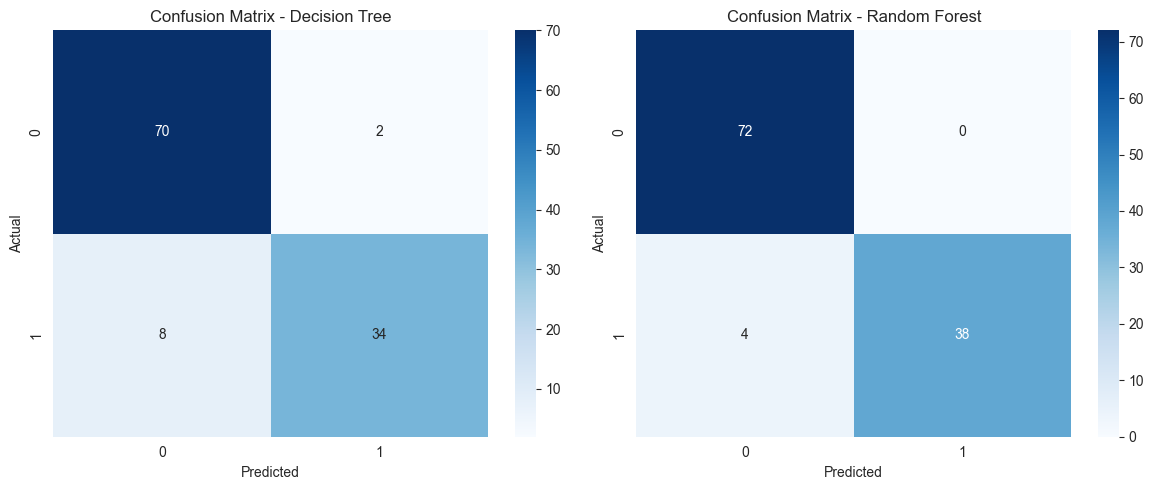

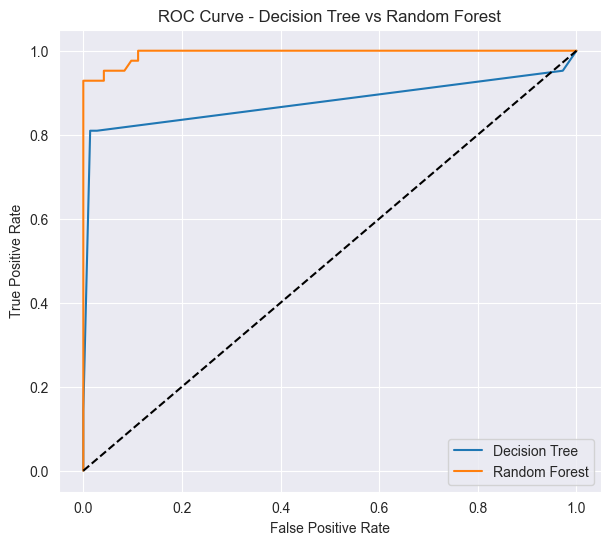

In [4]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


PATH = r"C:\Users\Administrator\Documents\breast cancer prediction\data.csv"
df = pd.read_csv(PATH)


df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")


df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

dt_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    f1_pos = report["1"]["f1-score"]

    results.append({
        "model": name,
        "accuracy": acc,
        "roc_auc": auc,
        "f1_malign": f1_pos
    })

    print(f"\n==== {name} ====")
    print("Accuracy:", round(acc, 4))
    print("ROC AUC:", round(auc, 4))
    print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


results_df = pd.DataFrame(results)
print("\n\nCompararea modelelor:")
print(results_df)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree vs Random Forest")
plt.legend()
plt.show()
